<a href="https://colab.research.google.com/github/pt-kunal-mishra/solar-irradiance-forecasting/blob/main/Solar_Irradiance_Forecasting_kunal_yash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Solar Irradiance Forecasting Model by Deep Learning Techniques 🌞 ☀***

#Resources



1. `tensorflow`:TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. It was developed by the Google Brain team for Google's internal use in research and production ==> 'https://www.tensorflow.org/'
2.`keras`:Keras is an open-source library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library ==> 'https://keras.io/api/'

##video playlist



*   `tensorflow`: ' https://www.youtube.com/watch?v=tpCFfeUEGs8&t=23387s'
*   `neural network`: 'https://www.youtube.com/watch?v=aircAruvnKk'







#Data

For the Raw data we used kaggle data:'https://www.kaggle.com/datasets/pythonafroz/solar-power'

##Install dependencies

In [1]:
!pip install keras-tcn --no-dependencies

##Import libraries

In [2]:
from tcn import TCN
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import math
from tqdm.notebook import tqdm
import random
import time as t
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Setting seeds value

In [3]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

##load dataset

In [4]:
desired_starting_row = 3
df = pd.read_csv('2019.csv', skiprows=desired_starting_row - 1)
df.head()

Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  Clearsky DNI  \
0  2019      1    1     0       0         16.1             0             0   
1  2019      1    1     0      15         16.1             0             0   
2  2019      1    1     0      30         16.1             0             0   
3  2019      1    1     0      45         16.1             0             0   
4  2019      1    1     1       0         16.1             0             0   

   Clearsky GHI  Cloud Type  Dew Point  DHI  DNI  Fill Flag  GHI  Ozone  \
0             0           0        7.0    0    0          0    0  0.223   
1             0           0        7.0    0    0          0    0  0.222   
2             0           0        7.0    0    0          0    0  0.222   
3             0           0        7.5    0    0          0    0  0.222   
4             0           0        7.5    0    0          0    0  0.222   

   Relative Humidity  Solar Zenith Angle  Surface Albedo  Pressure  \
0              54.73              120.08            0.17      1020   
1              54.73              116.78            0.17      1020   
2              54.73              113.49            0.17      1020   
3              56.83              110.22            0.17      1020   
4              56.83              106.98            0.17      1020   

   Precipitable Water  Wind Direction  Wind Speed  
0                 1.3               5         2.3  
1                 1.3               5         2.3  
2                 1.4               6         2.2  
3                 1.4               7         2.2  
4                 1.4               8         2.2

In [5]:
workingDf = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute','Cloud Type', 'Ozone','Solar Zenith Angle', 'Surface Albedo',
                    'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'DHI', 'DNI', 'Fill Flag'], axis = 1)
workingDf.head()

Temperature  Dew Point  GHI  Relative Humidity  Pressure  \
0         16.1        7.0    0              54.73      1020   
1         16.1        7.0    0              54.73      1020   
2         16.1        7.0    0              54.73      1020   
3         16.1        7.5    0              56.83      1020   
4         16.1        7.5    0              56.83      1020   

   Precipitable Water  Wind Direction  Wind Speed  
0                 1.3               5         2.3  
1                 1.3               5         2.3  
2                 1.4               6         2.2  
3                 1.4               7         2.2  
4                 1.4               8         2.2

In [6]:
columns = workingDf.columns.tolist()
columns[2], columns[-1] = columns[-1], columns[2]
workingDf = workingDf[columns]
workingDf.head()

Temperature  Dew Point  Wind Speed  Relative Humidity  Pressure  \
0         16.1        7.0         2.3              54.73      1020   
1         16.1        7.0         2.3              54.73      1020   
2         16.1        7.0         2.2              54.73      1020   
3         16.1        7.5         2.2              56.83      1020   
4         16.1        7.5         2.2              56.83      1020   

   Precipitable Water  Wind Direction  GHI  
0                 1.3               5    0  
1                 1.3               5    0  
2                 1.4               6    0  
3                 1.4               7    0  
4                 1.4               8    0

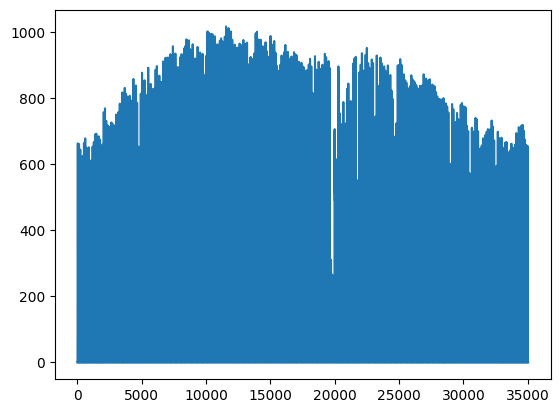

In [7]:
target = workingDf['GHI']
target.plot()
plt.show()

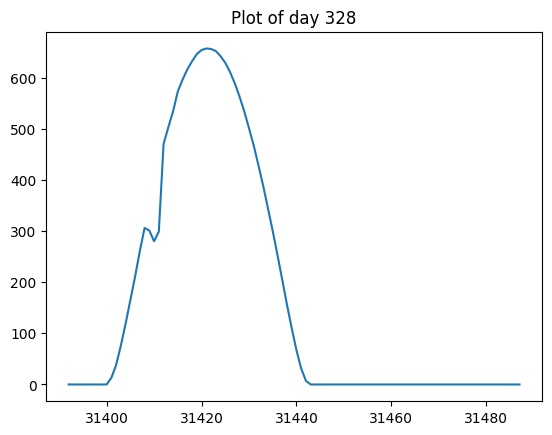

In [8]:
random_day = random.randint(1, 365)
target = workingDf['GHI'][(random_day-1)*96:(random_day*96)]
target.plot()
plt.title(str(f"Plot of day {random_day}"))
plt.show()

##standarization of data

In [9]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(workingDf), columns=workingDf.columns)
df_normalized.head(10)                     # this normalizes the data in between range [0, 1]

Temperature  Dew Point  Wind Speed  Relative Humidity  Pressure  \
0     0.169065   0.324921        0.21           0.454907  0.818182   
1     0.169065   0.324921        0.21           0.454907  0.818182   
2     0.169065   0.324921        0.20           0.454907  0.818182   
3     0.169065   0.340694        0.20           0.480193  0.818182   
4     0.169065   0.340694        0.20           0.480193  0.818182   
5     0.172662   0.340694        0.20           0.475858  0.818182   
6     0.172662   0.340694        0.19           0.476580  0.848485   
7     0.176259   0.350158        0.19           0.485250  0.848485   
8     0.179856   0.350158        0.19           0.480915  0.848485   
9     0.194245   0.350158        0.18           0.463817  0.848485   

   Precipitable Water  Wind Direction  GHI  
0            0.118421        0.013889  0.0  
1            0.118421        0.013889  0.0  
2            0.131579        0.016667  0.0  
3            0.131579        0.019444  0.0  
4            0.131579        0.022222  0.0  
5            0.144737        0.025000  0.0  
6            0.144737        0.025000  0.0  
7            0.144737        0.027778  0.0  
8            0.144737        0.027778  0.0  
9            0.144737        0.025000  0.0

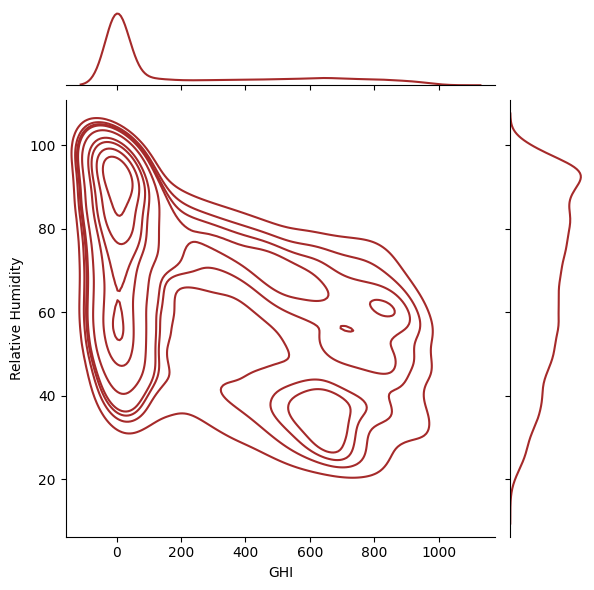

In [10]:
sns.jointplot(x='GHI',y='Relative Humidity',data = workingDf,kind='kde' ,color = 'brown')

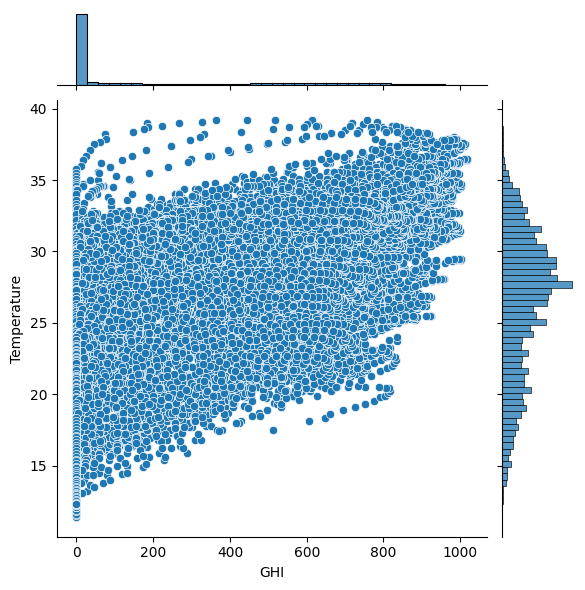

In [11]:
sns.jointplot(x='GHI',y='Temperature',data = workingDf)

<Axes: >

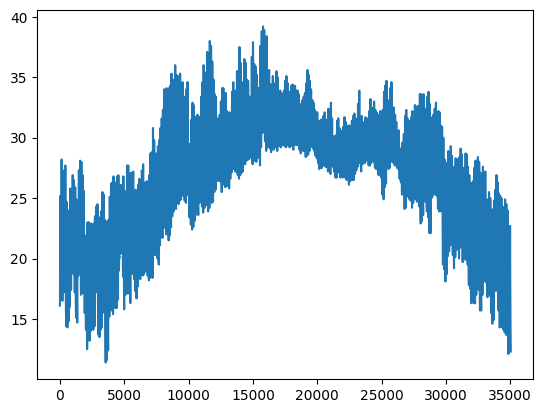

In [12]:
workingDf['Temperature'].plot()

<Axes: >

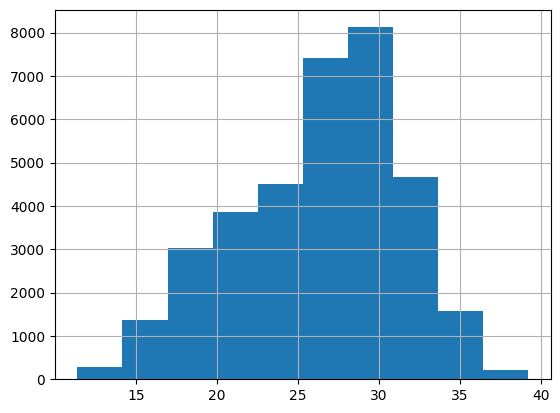

In [13]:
workingDf['Temperature'].hist()

<Axes: xlabel='GHI', ylabel='Density'>

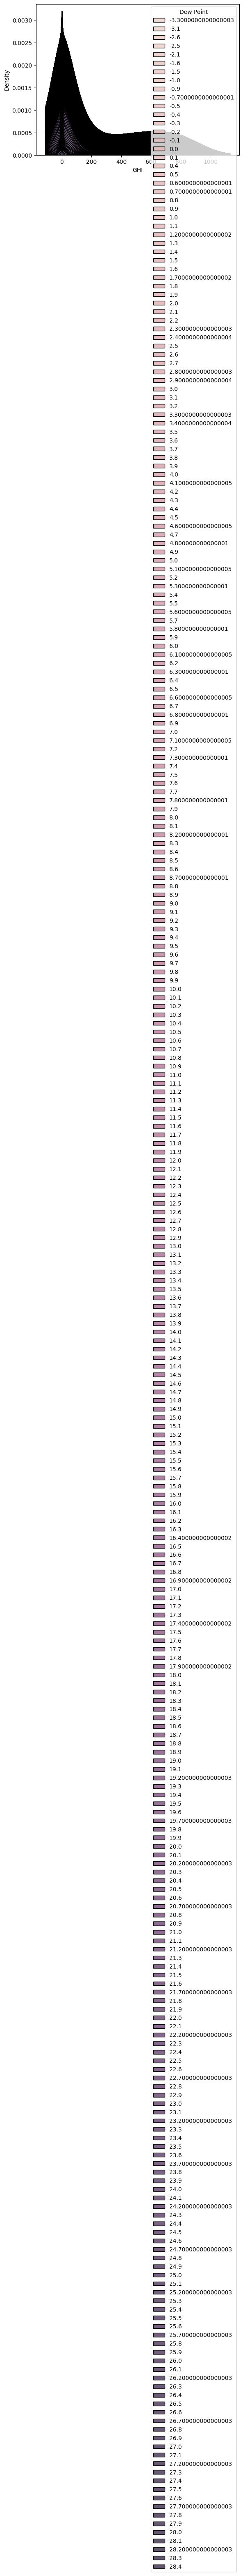

In [14]:
sns.kdeplot(data=workingDf,x="GHI",hue="Dew Point", multiple="stack")

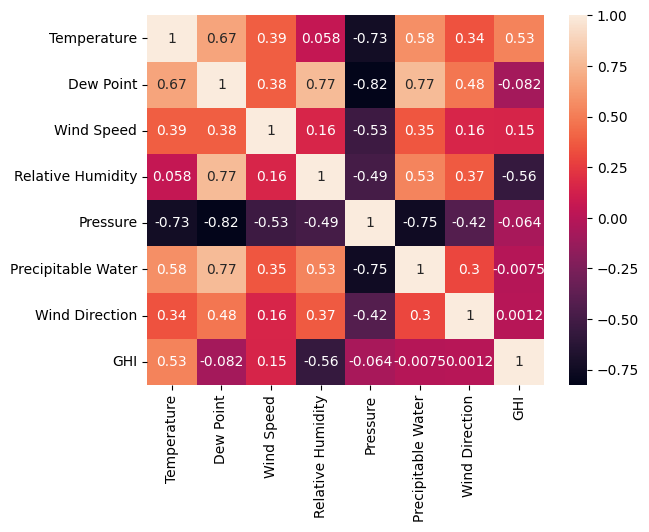

In [15]:
heatmap=sns.heatmap(workingDf.corr(), annot=True)
heatmap.cmap = "rocket"
plt.show()

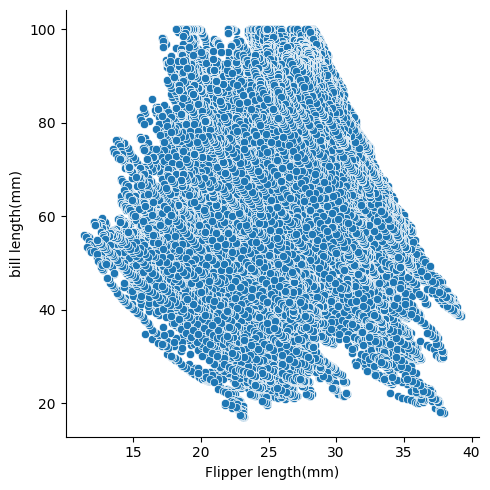

In [16]:
g = sns.relplot(data=workingDf, x="Temperature", y="Relative Humidity")
g.set_axis_labels("Flipper length(mm)", "bill length(mm)")

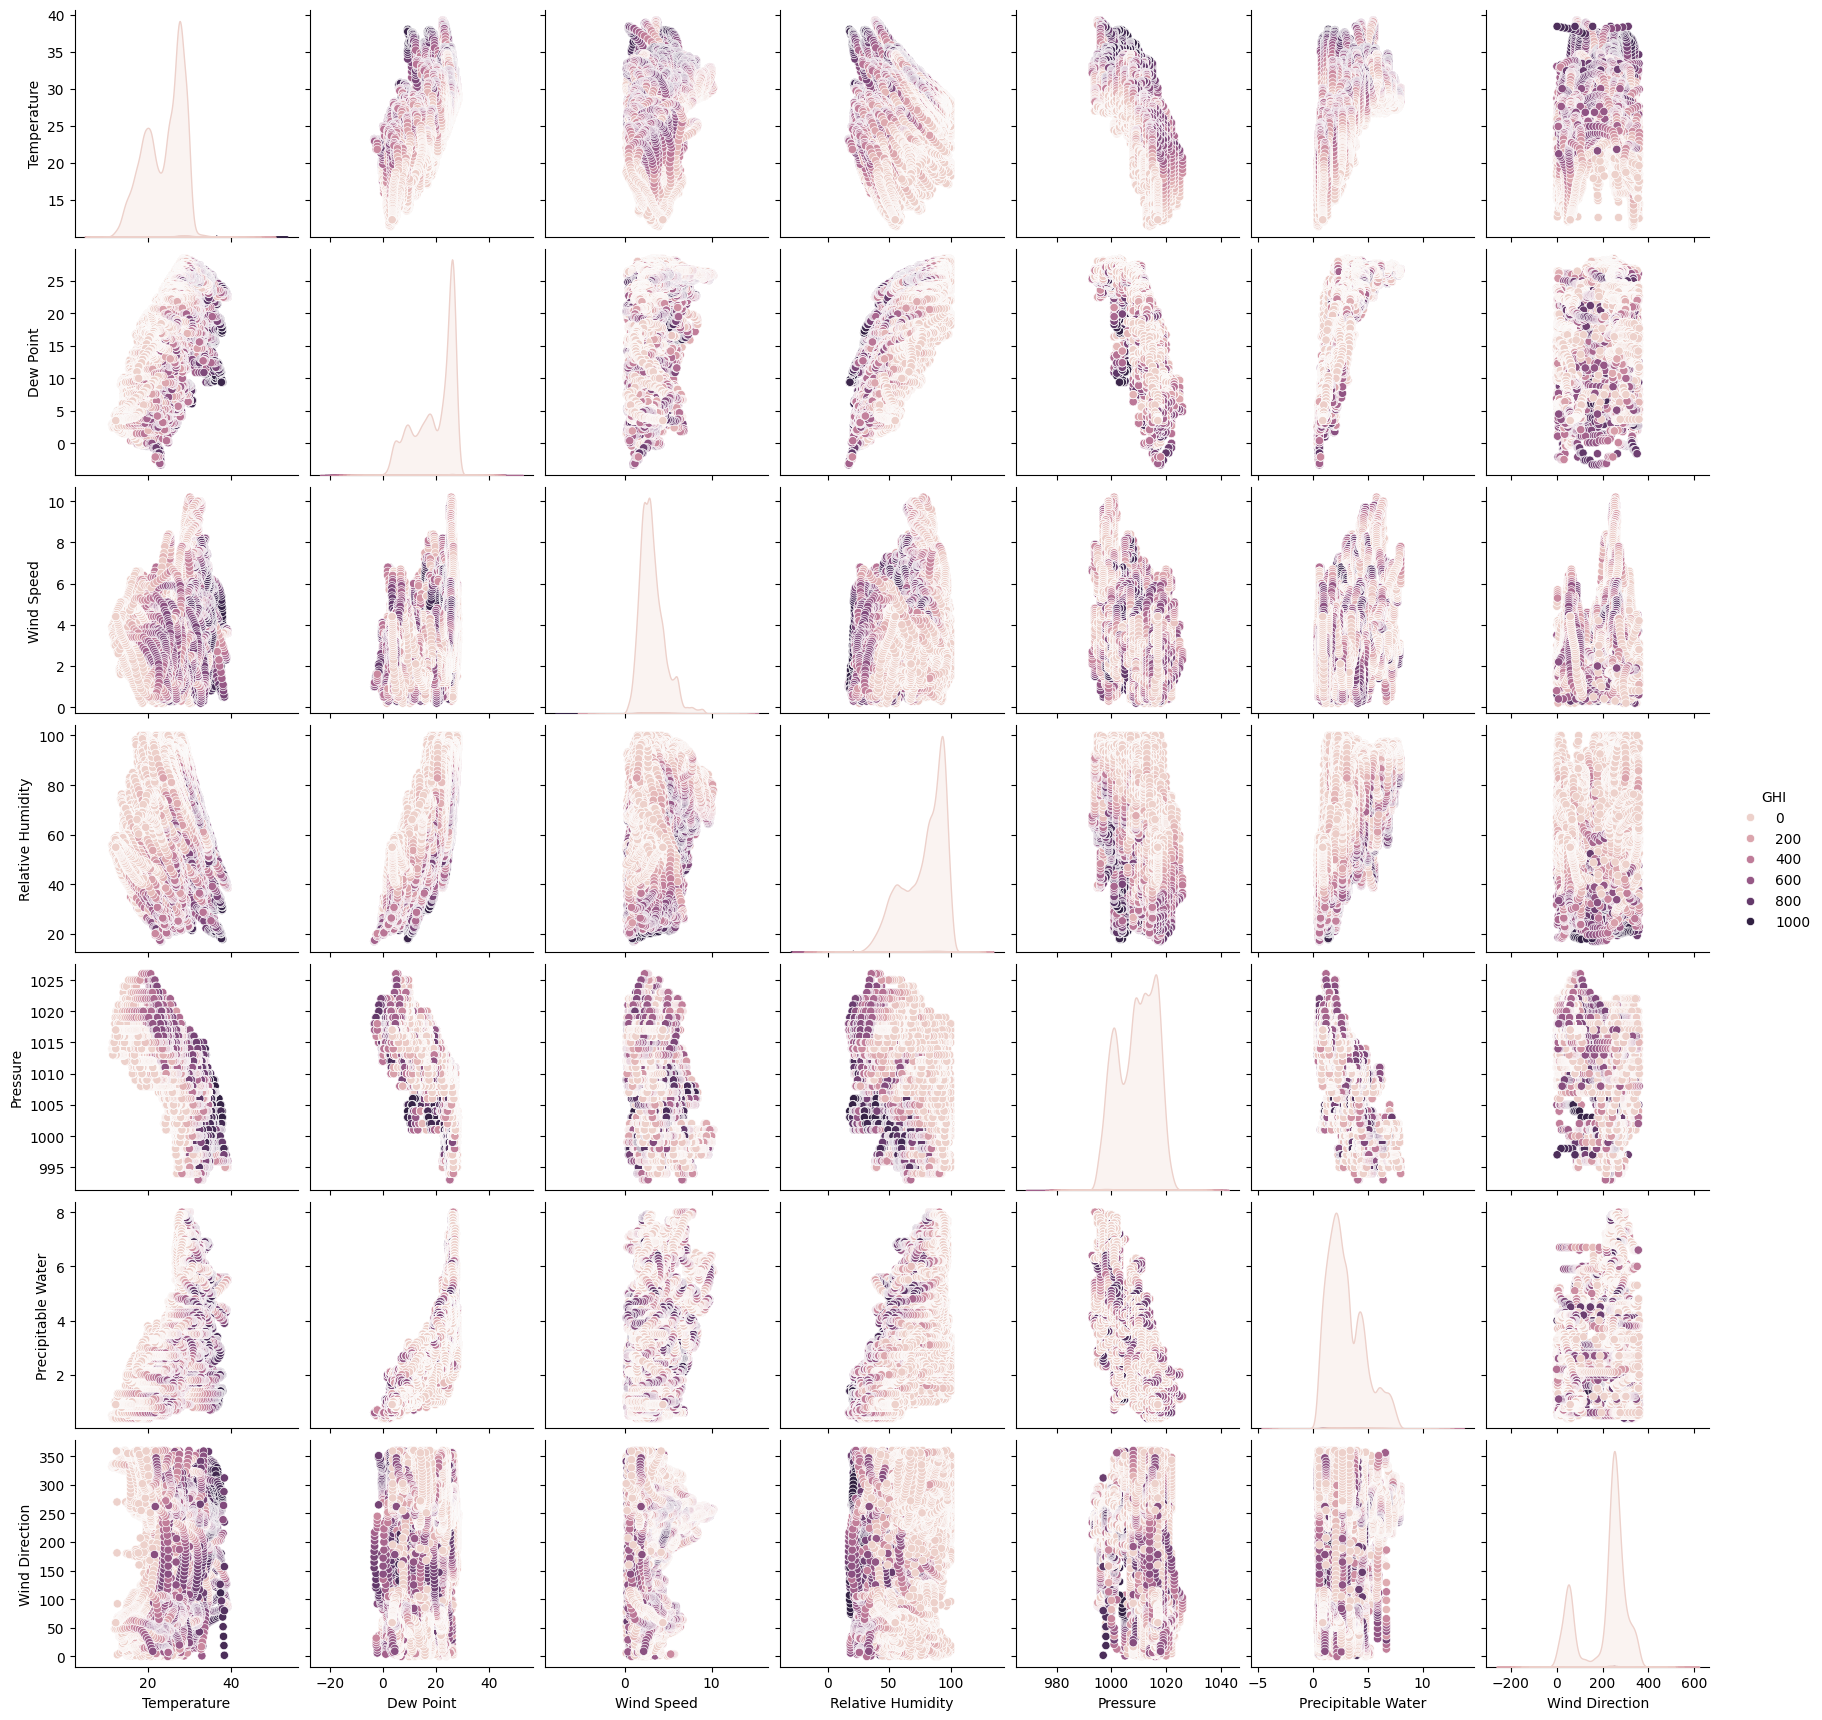

In [17]:
sns.pairplot(workingDf, hue= 'GHI')

In [18]:
per_day_readings = 4 * 24                  # readings in one hour x total number of hours in a day
days = 3                                   # this variable defines our window length
window_length = days * per_day_readings    # we want our model to look back at the data of 3 days
horizon = 1                                # and then predict the next 15th minute reading

In [19]:
df = df_normalized.values                  # converting dataframe to numpy arrays
stride = 1
x = []
y = []
for i in tqdm(range(0, len(df) - window_length, stride)):
    x.append(df[i:window_length+i, : ])    # GHI included but its past values only
    y.append(df[window_length+i,-1])       # next GHI value as our target which is to be predicted by the model

  0%|          | 0/34752 [00:00<?, ?it/s]

In [20]:
x = np.array(x)                            # converting our features to numpy array
y = np.array(y)                            # converting our target to numpy array
print(x.shape)                             # printing our total feature data's shape
print(y.shape)                             # printing our target data's shape

(34752, 288, 8)
(34752,)


In [21]:
x[45]

array([[0.43165468, 0.52996845, 0.38      , ..., 0.15789474, 0.73055556,
        0.25834971],
       [0.41726619, 0.52996845, 0.35      , ..., 0.15789474, 0.73055556,
        0.21021611],
       [0.39928058, 0.57097792, 0.32      , ..., 0.15789474, 0.73055556,
        0.16601179],
       ...,
       [0.49640288, 0.47634069, 0.36      , ..., 0.19736842, 0.675     ,
        0.30844794],
       [0.48920863, 0.51104101, 0.36      , ..., 0.19736842, 0.67777778,
        0.27013752],
       [0.48201439, 0.51104101, 0.36      , ..., 0.21052632, 0.68333333,
        0.11198428]])

In [22]:
y[44]

0.11198428290766207

##splitting our dataset into two parts one will be training set and the other will be testing set

In [23]:

testing_days = 10
x_train = x[:-per_day_readings*testing_days]
y_train = y[:-per_day_readings*testing_days]
x_test  = x[len(y) - per_day_readings*testing_days:]
y_test  = y[len(y) - per_day_readings*testing_days:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33792, 288, 8)
(33792,)
(960, 288, 8)
(960,)


In [24]:
set_epochs = 200

In [25]:
# Define a function to print layer names and activations
def print_layer_activations(model):
    for layer in model.layers:
        print(f"Layer: {layer.name} - Activation: {layer.activation}")

# RNN model

In [26]:
modelRNN = tf.keras.Sequential([
    keras.layers.SimpleRNN(64, input_shape=(288, 8), return_sequences=False),
    keras.layers.Dense(1, activation="sigmoid")
])
# Define the learning rate
learning_rate = 0.001

# Compile the model with the optimizer and learning rate
modelRNN.compile(loss='mae',
              optimizer=tf.keras.optimizers.AdamW(learning_rate=learning_rate),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

modelRNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4672      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Print layer names and activations
print_layer_activations(modelRNN)

Layer: simple_rnn - Activation: <function tanh at 0x7e38e7b9a830>
Layer: dense - Activation: <function sigmoid at 0x7e38e7b9a9e0>


# GRU model

In [28]:
# GRU Model
modelGRU = tf.keras.Sequential([
    keras.layers.GRU(32, input_shape=(288, 8), return_sequences=True),
    keras.layers.GRU(32, return_sequences=False),
    keras.layers.Dense(1, activation="sigmoid")
])
# Define the learning rate
learning_rate = 0.001

# Compile the model with the optimizer and learning rate
modelGRU.compile(loss='mae',
              optimizer=tf.keras.optimizers.AdamW(learning_rate=learning_rate),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

modelGRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 288, 32)           4032      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Print layer names and activations
print_layer_activations(modelGRU)

Layer: gru - Activation: <function tanh at 0x7e38e7b9a830>
Layer: gru_1 - Activation: <function tanh at 0x7e38e7b9a830>
Layer: dense_1 - Activation: <function sigmoid at 0x7e38e7b9a9e0>


# LSTM model

In [30]:
# LSTM Model
modelLSTM = tf.keras.Sequential([
    keras.layers.LSTM(64, input_shape=(288, 8), return_sequences=True),
    keras.layers.LSTM(64, return_sequences=False),
    keras.layers.Dense(1, activation="sigmoid")
])
# Define the learning rate
learning_rate = 0.001

# Compile the model with the optimizer and learning rate
modelLSTM.compile(loss='mae',
              optimizer=tf.keras.optimizers.AdamW(learning_rate=learning_rate),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

modelLSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 288, 64)           18688     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 51777 (202.25 KB)
Trainable params: 51777 (202.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Print layer names and activations
print_layer_activations(modelLSTM)

Layer: lstm - Activation: <function tanh at 0x7e38e7b9a830>
Layer: lstm_1 - Activation: <function tanh at 0x7e38e7b9a830>
Layer: dense_2 - Activation: <function sigmoid at 0x7e38e7b9a9e0>


# TCN model

In [32]:
# TCN Model
modelTCN   = keras.models.Sequential([
              TCN(input_shape=(288, 8),
              kernel_size=15,
              nb_filters=15,
              dilations=[1, 2, 4, 8],
              padding='causal',
              activation='relu',
              return_sequences=False,
              nb_stacks=2,
              use_skip_connections=False,
              use_batch_norm=True
              ),
              keras.layers.Dense(1, activation="sigmoid")])

# Define the learning rate
learning_rate = 0.01

# Compile the model with the optimizer and learning rate
modelTCN.compile(loss='mae',
              optimizer=tf.keras.optimizers.AdamW(learning_rate=learning_rate, weight_decay = 0.001),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

modelTCN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 15)                53760     
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 53776 (210.06 KB)
Trainable params: 53296 (208.19 KB)
Non-trainable params: 480 (1.88 KB)
_________________________________________________________________


In [33]:
print("Layer: TCN - Activation: ReLU")
print("Layer: Dense - Activation: sigmoid")

Layer: TCN - Activation: ReLU
Layer: Dense - Activation: sigmoid


In [34]:
time1 = t.time()
print('Train...')
epochs = set_epochs
historyRNN = modelRNN.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1, batch_size=8192)
timeRNN = t.time() - time1
print(f"Total time to train {epochs} of RNN model is {timeRNN}")

Train...
Epoch 1/200
5/5 [==============================] - 4s 231ms/step - loss: 0.3163 - root_mean_squared_error: 0.3525
Epoch 2/200
5/5 [==============================] - 1s 175ms/step - loss: 0.2212 - root_mean_squared_error: 0.3085
Epoch 3/200
5/5 [==============================] - 1s 183ms/step - loss: 0.2013 - root_mean_squared_error: 0.3014
Epoch 4/200
5/5 [==============================] - 1s 178ms/step - loss: 0.1686 - root_mean_squared_error: 0.2266
Epoch 5/200
5/5 [==============================] - 1s 177ms/step - loss: 0.1197 - root_mean_squared_error: 0.1685
Epoch 6/200
5/5 [==============================] - 1s 183ms/step - loss: 0.0948 - root_mean_squared_error: 0.1419
Epoch 7/200
5/5 [==============================] - 1s 189ms/step - loss: 0.0844 - root_mean_squared_error: 0.1323
Epoch 8/200
5/5 [==============================] - 1s 192ms/step - loss: 0.0769 - root_mean_squared_error: 0.1122
Epoch 9/200
5/5 [==============================] - 1s 184ms/step - loss: 0.0705

In [35]:
time1 = t.time()
print('Train...')
epochs = set_epochs
historyGRU = modelGRU.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1, batch_size=8192)
timeGRU = t.time() - time1
print(f"Total time to train {epochs} of GRU model is {timeGRU}")

Train...
Epoch 1/200
5/5 [==============================] - 5s 259ms/step - loss: 0.3365 - root_mean_squared_error: 0.3622
Epoch 2/200
5/5 [==============================] - 1s 236ms/step - loss: 0.2913 - root_mean_squared_error: 0.3151
Epoch 3/200
5/5 [==============================] - 1s 236ms/step - loss: 0.2578 - root_mean_squared_error: 0.2974
Epoch 4/200
5/5 [==============================] - 1s 236ms/step - loss: 0.2357 - root_mean_squared_error: 0.3049
Epoch 5/200
5/5 [==============================] - 1s 237ms/step - loss: 0.2241 - root_mean_squared_error: 0.3231
Epoch 6/200
5/5 [==============================] - 1s 240ms/step - loss: 0.2197 - root_mean_squared_error: 0.3383
Epoch 7/200
5/5 [==============================] - 1s 240ms/step - loss: 0.2181 - root_mean_squared_error: 0.3461
Epoch 8/200
5/5 [==============================] - 1s 241ms/step - loss: 0.2169 - root_mean_squared_error: 0.3481
Epoch 9/200
5/5 [==============================] - 1s 244ms/step - loss: 0.2150

In [36]:
time1 = t.time()
print('Train...')
epochs = set_epochs
historyLSTM = modelLSTM.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1, batch_size=8192)
timeLSTM = t.time() - time1
print(f"Total time to train {epochs} of LSTM model is {timeLSTM}")

Train...
Epoch 1/200
5/5 [==============================] - 6s 453ms/step - loss: 0.3433 - root_mean_squared_error: 0.3721
Epoch 2/200
5/5 [==============================] - 2s 462ms/step - loss: 0.2478 - root_mean_squared_error: 0.3016
Epoch 3/200
5/5 [==============================] - 2s 472ms/step - loss: 0.2210 - root_mean_squared_error: 0.3502
Epoch 4/200
5/5 [==============================] - 3s 481ms/step - loss: 0.2206 - root_mean_squared_error: 0.3650
Epoch 5/200
5/5 [==============================] - 3s 482ms/step - loss: 0.2207 - root_mean_squared_error: 0.3680
Epoch 6/200
5/5 [==============================] - 3s 483ms/step - loss: 0.2206 - root_mean_squared_error: 0.3689
Epoch 7/200
5/5 [==============================] - 3s 483ms/step - loss: 0.2206 - root_mean_squared_error: 0.3688
Epoch 8/200
5/5 [==============================] - 3s 491ms/step - loss: 0.2204 - root_mean_squared_error: 0.3686
Epoch 9/200
5/5 [==============================] - 3s 496ms/step - loss: 0.2202

In [37]:
time1 = t.time()
print('Train...')
epochs = set_epochs
historyTCN = modelTCN.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1, batch_size=8192)
timeTCN = t.time() - time1
print(f"Total time to train {epochs} of TCN model is {timeTCN}")

Train...
Epoch 1/200
5/5 [==============================] - 39s 3s/step - loss: 0.2996 - root_mean_squared_error: 0.4491
Epoch 2/200
5/5 [==============================] - 7s 1s/step - loss: 0.1207 - root_mean_squared_error: 0.2130
Epoch 3/200
5/5 [==============================] - 7s 1s/step - loss: 0.0929 - root_mean_squared_error: 0.1689
Epoch 4/200
5/5 [==============================] - 7s 1s/step - loss: 0.0685 - root_mean_squared_error: 0.1280
Epoch 5/200
5/5 [==============================] - 7s 1s/step - loss: 0.0508 - root_mean_squared_error: 0.0984
Epoch 6/200
5/5 [==============================] - 7s 1s/step - loss: 0.0422 - root_mean_squared_error: 0.0825
Epoch 7/200
5/5 [==============================] - 7s 1s/step - loss: 0.0373 - root_mean_squared_error: 0.0745
Epoch 8/200
5/5 [==============================] - 7s 1s/step - loss: 0.0354 - root_mean_squared_error: 0.0716
Epoch 9/200
5/5 [==============================] - 6s 1s/step - loss: 0.0354 - root_mean_squared_error

### Extract the history of loss and metric result from the history object

In [38]:
#RNN
loss_history_rnn = historyRNN.history['loss']
r2_history_rnn = historyRNN.history['root_mean_squared_error']

#GRU
loss_history_gru = historyGRU.history['loss']
r2_history_gru = historyGRU.history['root_mean_squared_error']

#LSTM
loss_history_lstm = historyLSTM.history['loss']
r2_history_lstm = historyLSTM.history['root_mean_squared_error']

#TCN
loss_history_tcn = historyTCN.history['loss']
r2_history_tcn = historyTCN.history['root_mean_squared_error']

# RNN loss and Metric Plot

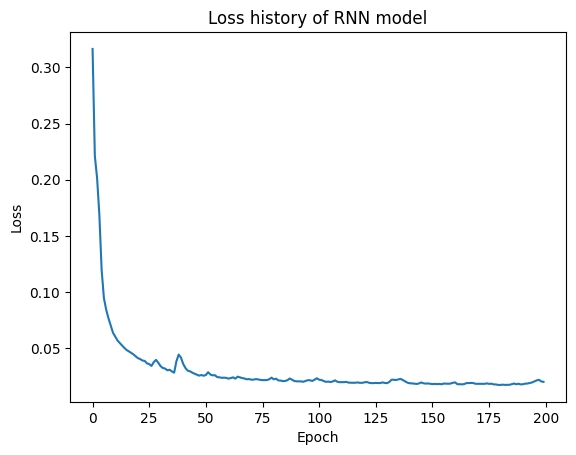

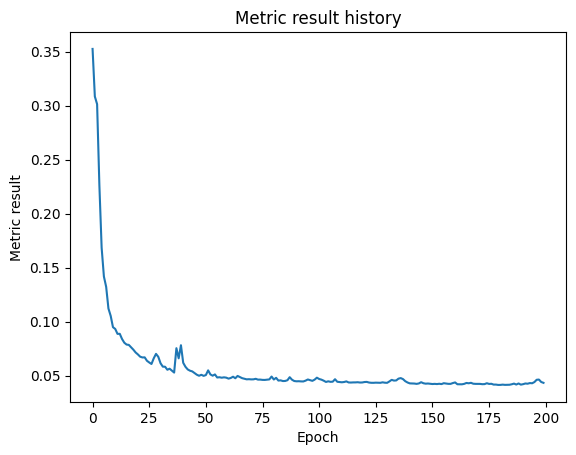

In [39]:
# Plot the history of loss of RNN
plt.plot(loss_history_rnn)
plt.title('Loss history of RNN model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the history of metric result of RNN
plt.plot(r2_history_rnn)
plt.title('Metric result history')
plt.xlabel('Epoch')
plt.ylabel('Metric result')
plt.show()

# GRU loss and Metric Plot

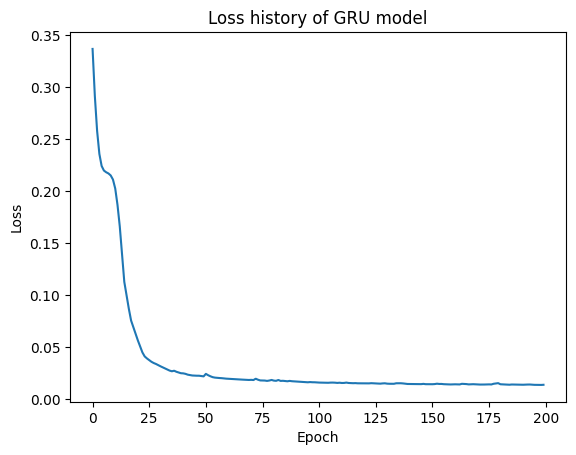

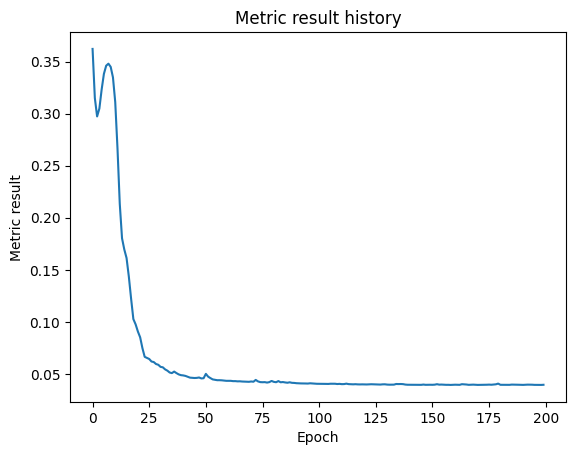

In [40]:
# Plot the history of loss of GRU
plt.plot(loss_history_gru)
plt.title('Loss history of GRU model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the history of metric result of GRU
plt.plot(r2_history_gru)
plt.title('Metric result history')
plt.xlabel('Epoch')
plt.ylabel('Metric result')
plt.show()

# LSTM loss and Metric Plot

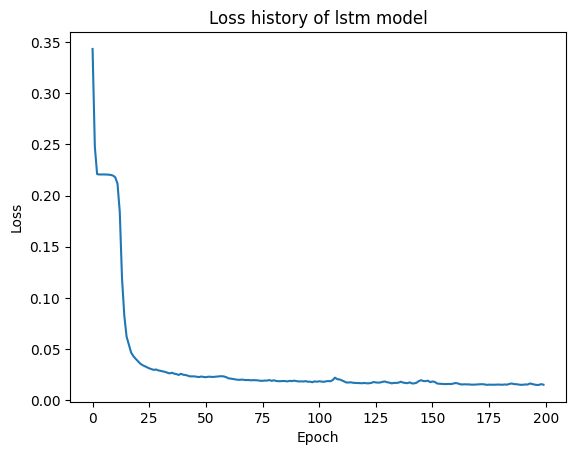

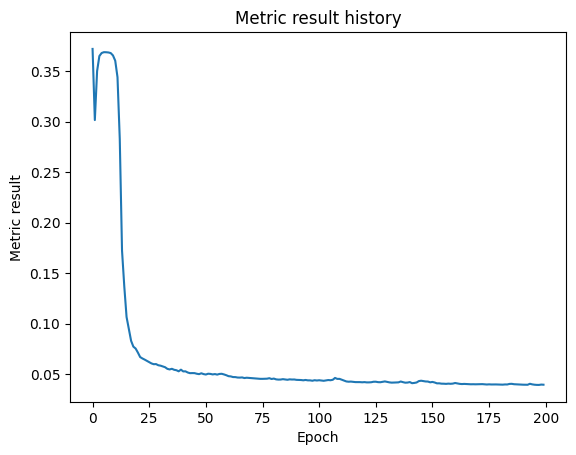

In [41]:
# Plot the history of loss of LSTM
plt.plot(loss_history_lstm)
plt.title('Loss history of lstm model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the history of metric result of LSTM
plt.plot(r2_history_lstm)
plt.title('Metric result history')
plt.xlabel('Epoch')
plt.ylabel('Metric result')
plt.show()

# TCN loss and Metric Plot

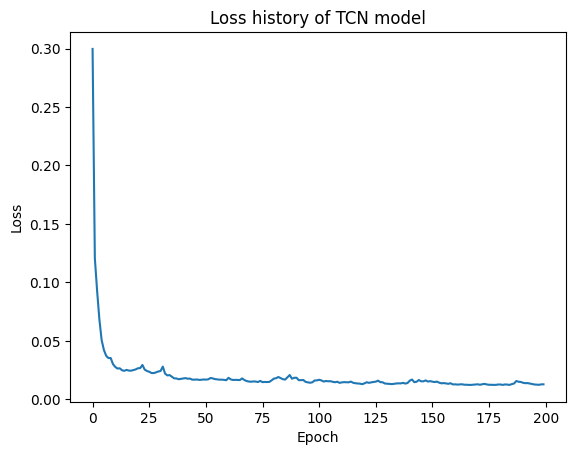

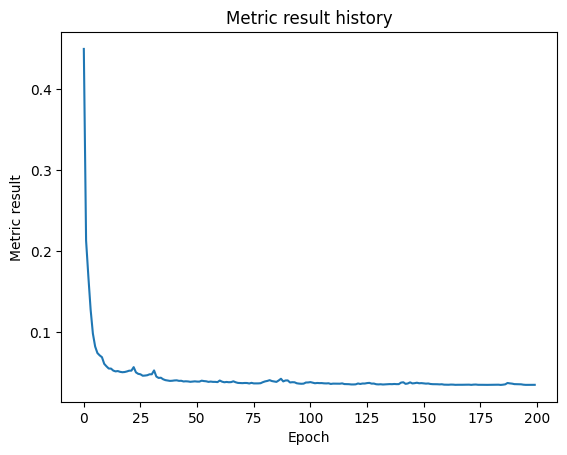

In [42]:
# Plot the history of loss of LSTM
plt.plot(loss_history_tcn)
plt.title('Loss history of TCN model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the history of metric result of LSTM
plt.plot(r2_history_tcn)
plt.title('Metric result history')
plt.xlabel('Epoch')
plt.ylabel('Metric result')
plt.show()

In [43]:
# RNN prediction
t1 = t.time()
predictionRNN = modelRNN.predict(x_test)
inferRNN = t.time() - t1

# GRU prediction
t1 = t.time()
predictionGRU = modelGRU.predict(x_test)
inferGRU = t.time() - t1

# LSTM prediction
t1 = t.time()
predictionLSTM = modelLSTM.predict(x_test)
inferLSTM = t.time() - t1

# TCN prediction
t1 = t.time()
predictionTCN = modelTCN.predict(x_test)
inferTCN = t.time() - t1

30/30 [==============================] - 1s 5ms/step


In [44]:
# Update the metric with the true values and predicted values
MSE_RNN = mean_squared_error(y_test, predictionRNN.reshape(predictionRNN.shape[0])  )
print("Root Mean Squared Error (RNN):", round(math.sqrt(MSE_RNN), 6))

MSE_GRU = mean_squared_error(y_test, predictionGRU.reshape(predictionGRU.shape[0])  )
print("Root Mean Squared Error (GRU):", round(math.sqrt(MSE_GRU), 6))

MSE_LSTM = mean_squared_error(y_test, predictionLSTM.reshape(predictionLSTM.shape[0]))
print("Root Mean Squared Error (LSTM):", round(math.sqrt(MSE_LSTM), 6))

MSE_TCN = mean_squared_error(y_test, predictionTCN.reshape(predictionTCN.shape[0])  )
print("Root Mean Squared Error (TCN):", round(math.sqrt(MSE_TCN), 6))

Root Mean Squared Error (RNN): 0.022634
Root Mean Squared Error (GRU): 0.022128
Root Mean Squared Error (LSTM): 0.021246
Root Mean Squared Error (TCN): 0.036194


In [45]:
print("R2 accuracy of RNN model is :",round(r2_score(y_test, predictionRNN.reshape(predictionRNN.shape[0])), 6)   )

print("R2 accuracy of GRU model is :",round(r2_score(y_test, predictionGRU.reshape(predictionGRU.shape[0])), 6)   )

print("R2 accuracy of LSTM model is :",round(r2_score(y_test, predictionLSTM.reshape(predictionLSTM.shape[0])), 6))

print("R2 accuracy of TCN model is :",round(r2_score(y_test, predictionTCN.reshape(predictionTCN.shape[0])), 6)   )

R2 accuracy of RNN model is : 0.991598
R2 accuracy of GRU model is : 0.991969
R2 accuracy of LSTM model is : 0.992597
R2 accuracy of TCN model is : 0.978515


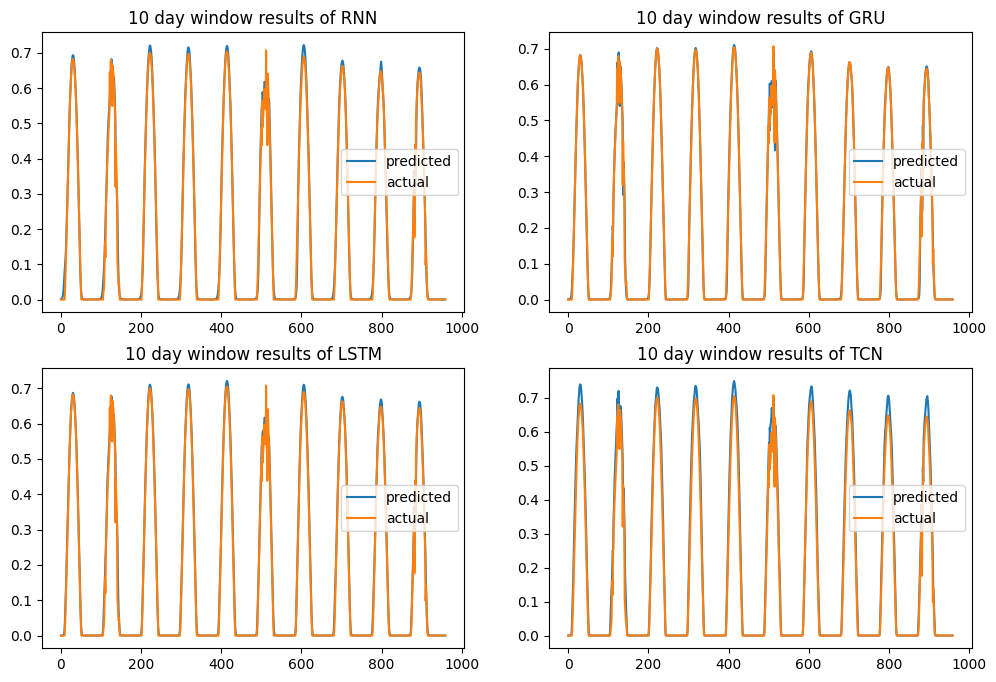

In [46]:
# Making the figure size bigger
plt.figure(figsize=(12, 8))

# RNN's prediction plot
plt.subplot(2,2,1)
plt.plot(predictionRNN)
plt.plot(y_test)
plt.title(f'{testing_days} day window results of RNN')
plt.legend(['predicted', 'actual'])

# GRU's prediction plot
plt.subplot(2,2,2)
plt.plot(predictionGRU)
plt.plot(y_test)
plt.title(f'{testing_days} day window results of GRU')
plt.legend(['predicted', 'actual'])

# LSTM's prediction plot
plt.subplot(2,2,3)
plt.plot(predictionLSTM)
plt.plot(y_test)
plt.title(f'{testing_days} day window results of LSTM')
plt.legend(['predicted', 'actual'])

# TCN's prediction plot
plt.subplot(2,2,4)
plt.plot(predictionTCN)
plt.plot(y_test)
plt.title(f'{testing_days} day window results of TCN')
plt.legend(['predicted', 'actual'])
plt.savefig('PlotImg.png')
plt.show()

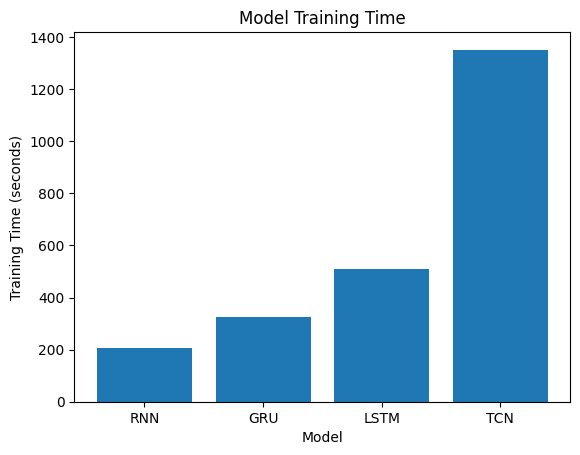

In [47]:
models = ['RNN', 'GRU', 'LSTM','TCN']
timeTrain = [timeRNN, timeGRU, timeLSTM, timeTCN]
timeInfer = [inferRNN, inferGRU, inferLSTM, inferTCN]

plt.bar(models, timeTrain)
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Model Training Time')
plt.savefig('trainingImg.png')
plt.show()

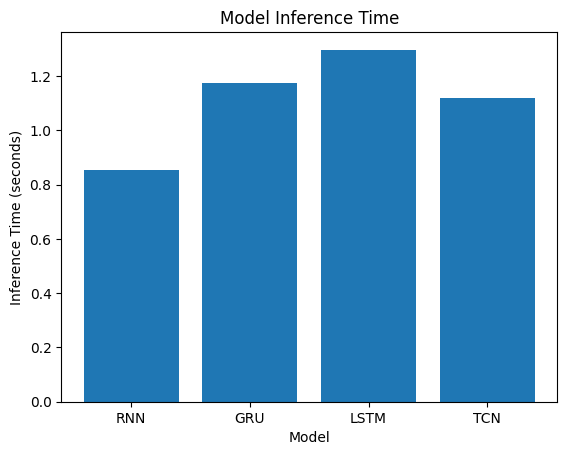

In [48]:
plt.bar(models, timeInfer)
plt.xlabel('Model')
plt.ylabel('Inference Time (seconds)')
plt.title('Model Inference Time')
plt.savefig('InferingImg.png')
plt.show()

In [67]:
class ModelSaver:
    def save_model(self, model, name):
        from tensorflow.keras.models import load_model
        self.name = name
        model.save(name)

# Create an instance of the ModelSaver class
model_saver = ModelSaver()

# Save the model
model_saver.save_model(modelLSTM, 'model_saves.hdf5')
model_saver.save_model(modelRNN, 'model_RNN.hdf5')
model_saver.save_model(modelGRU, 'model_GRU.hdf5')